In [1]:
from ts2vec import TS2Vec, datautils

# Load the ECG200 dataset from UCR archive
# train_data, train_labels, test_data, test_labels = datautils.load_forecast_csv('ETTh1')
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols = datautils.load_forecast_csv('ETTh1')
train_data = data[:, train_slice]
test_data = data[:, test_slice                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ]
# (Both train_data and test_data have a shape of n_instances x n_timestamps x n_features)

# Train a TS2Vec model
model = TS2Vec(
    input_dims=train_data.shape[-1],
    device=0,
    output_dims=320
)
loss_log = model.fit(
    train_data,
    verbose=True
)

# Compute timestamp-level representations for test set
test_repr = model.encode(test_data)  # n_instances x n_timestamps x output_dims

# Compute instance-level representations for test set
test_repr = model.encode(test_data, encoding_window='full_series')  # n_instances x output_dims

# Sliding inference for test set
test_repr = model.encode(
    test_data,
    causal=True,
    sliding_length=1,
    sliding_padding=50
)  # n_instances x n_timestamps x output_dims
# (The timestamp t's representation vector is computed using the observations located in [t-50, t])

Epoch #0: loss=4.4280686378479
Epoch #1: loss=3.6024484634399414
Epoch #2: loss=3.9666528701782227
Epoch #3: loss=2.6777684688568115
Epoch #4: loss=2.280733346939087
Epoch #5: loss=2.3984642028808594
Epoch #6: loss=2.2578070163726807
Epoch #7: loss=2.113323450088501
Epoch #8: loss=1.9919514656066895
Epoch #9: loss=1.9883122444152832
Epoch #10: loss=1.8054128885269165
Epoch #11: loss=1.7464287281036377
Epoch #12: loss=1.6586709022521973
Epoch #13: loss=1.692692756652832
Epoch #14: loss=1.7739577293395996
Epoch #15: loss=1.655250906944275
Epoch #16: loss=0.9880768656730652
Epoch #17: loss=1.704189658164978
Epoch #18: loss=1.5853307247161865
Epoch #19: loss=1.606935739517212
Epoch #20: loss=1.624230146408081
Epoch #21: loss=1.5788830518722534
Epoch #22: loss=1.597557544708252
Epoch #23: loss=1.6518539190292358
Epoch #24: loss=1.4876049757003784
Epoch #25: loss=1.5531560182571411
Epoch #26: loss=1.552365779876709
Epoch #27: loss=1.4477553367614746
Epoch #28: loss=1.4838628768920898
Epoch #

In [11]:
train_data.shape

(1, 8640, 14)

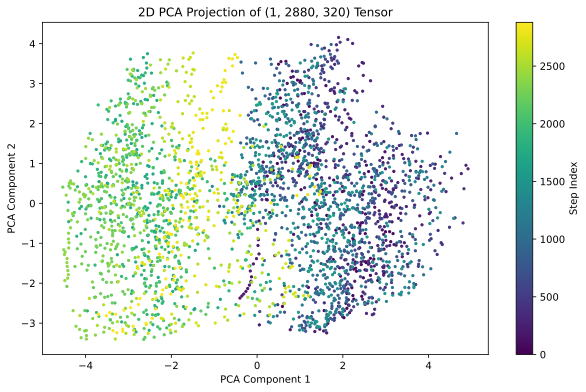

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions from 320 to 2
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(test_repr.squeeze())

# Plotting the reduced data
plt.figure(figsize=(10, 6))
plt.scatter(data_reduced[:, 0], data_reduced[:, 1], c=np.arange(2880), cmap='viridis', s=5)
plt.colorbar(label="Step Index")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("2D PCA Projection of (1, 2880, 320) Tensor")
plt.show()


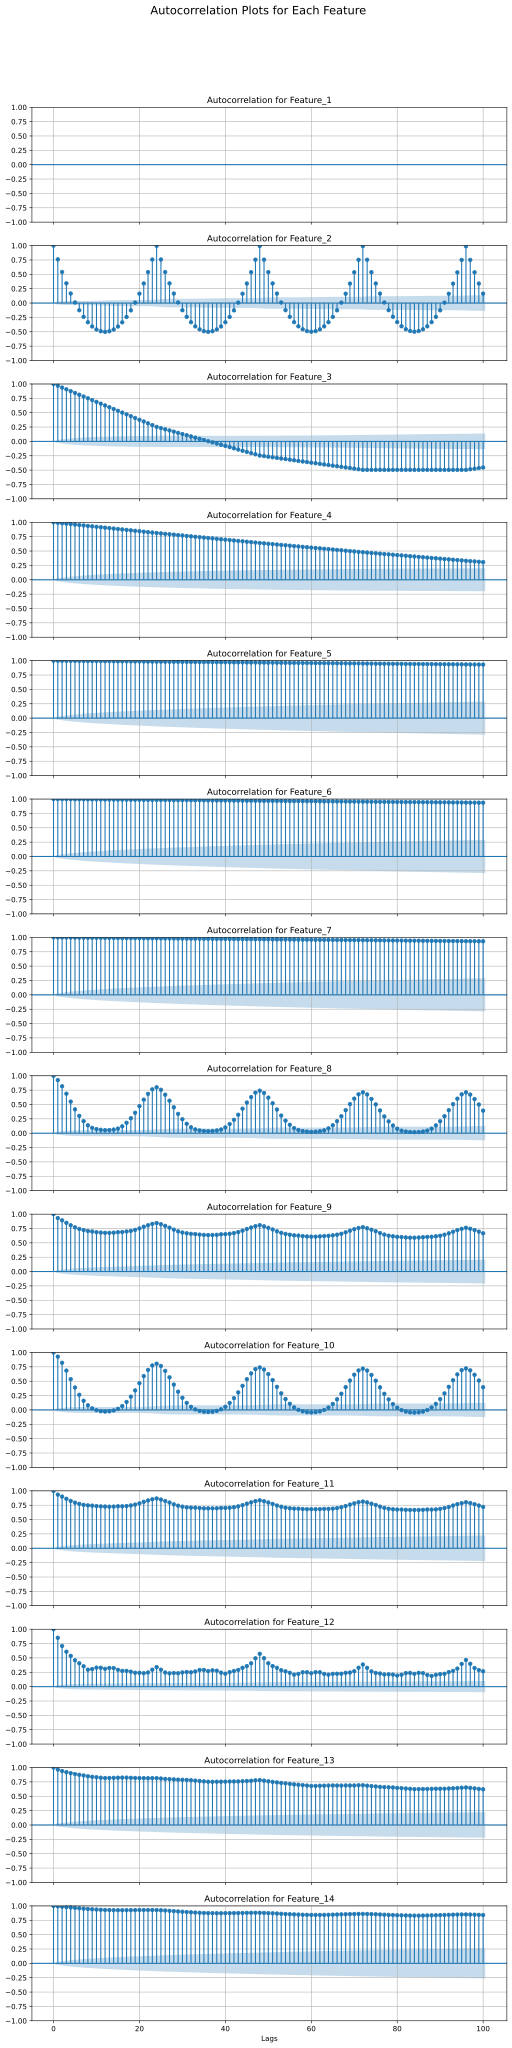

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Example multivariate time series data (n, features)
# Generating sample data for demonstration
np.random.seed(0)
n, features = 100, 14  # 100 time steps, 3 features
# data = np.random.randn(n, features)
time_series = pd.DataFrame(train_data.squeeze(), columns=[f'Feature_{i+1}' for i in range(features)])

# Set maximum lag
max_lag = 100

# Plot autocorrelation for each feature
fig, axes = plt.subplots(features, 1, figsize=(10, 3 * features), sharex=True)
fig.suptitle('Autocorrelation Plots for Each Feature', fontsize=16)

# Generate and plot ACF for each feature
for i, column in enumerate(time_series.columns):
    plot_acf(time_series[column], lags=max_lag, ax=axes[i])
    axes[i].set_title(f'Autocorrelation for {column}')
    axes[i].grid()

plt.xlabel('Lags')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()
